# Part I - Ford GoBike System Exploratory Data
## by Nifemi Lawal

## Introduction

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [72]:
print(df.shape, '\n')
print(df.info(), '\n')
print(df.dtypes, '\n')
df.head()

(171305, 22) 

<class 'pandas.core.frame.DataFrame'>
Index: 171305 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171305 non-null  int64         
 1   start_time               171305 non-null  datetime64[ns]
 2   end_time                 171305 non-null  datetime64[ns]
 3   start_station_id         171305 non-null  float64       
 4   start_station_name       171305 non-null  object        
 5   start_station_latitude   171305 non-null  float64       
 6   start_station_longitude  171305 non-null  float64       
 7   end_station_id           171305 non-null  float64       
 8   end_station_name         171305 non-null  object        
 9   end_station_latitude     171305 non-null  float64       
 10  end_station_longitude    171305 non-null  float64       
 11  bike_id                  171305 non-null  int64         
 12  user_t

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,February,17,Friday,March,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,February,12,Friday,March,5
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,Thursday,February,23,Friday,March,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,Thursday,February,23,Friday,March,0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983.0,Female,No,Thursday,February,23,Friday,March,0


### Issue #1: Values with missing columns 
(Missing values in start_station_id, start_station_name, end_station_id , end_station_name, member_birth_year, member_gender columns)

In [6]:
null_values = df.isnull().sum()
null_values

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df = df[df['member_gender'] != 'Other']

In [8]:
df.dropna(inplace=True)

In [9]:
null_values = df.isnull().sum()
null_values

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Issue #2: Datatype issue 
(the start and end time columns are in string format)

In [10]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [75]:
start_dtype = df['start_time'].dtype
end_dtype = df['start_time'].dtype
print(f"Data type of column 'start_time': start_dtype")
print(f"Data type of column 'end_time': end_dtype")

Data type of column 'start_time': start_dtype
Data type of column 'end_time': end_dtype


to make things easier, we will be splitting out start and end times into hour, day and month to allow for further analysis 

In [76]:
import datetime as dt
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()
df['start_hr'] = df['start_time'].dt.hour
#df['start_hr'] = df.start_hr.astype(str)

df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()
df['end_hr'] = df['end_time'].dt.hour
#df['end_hr'] = df.end_hr.astype(str)
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,February,17,Friday,March,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,February,12,Friday,March,5
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,Thursday,February,23,Friday,March,0


### What is the structure of your dataset?

> This document explores information about ober  183,000 individual rides made made in a bike-sharing system covering the greater San Francisco Bay area.
> It contains the ride duration (in seconds), the start and end station information (location, id and name), member information (user type, birth year and gender).
> it can be downloaded here: https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv

### What is/are the main feature(s) of interest in your dataset?
> from our dataset, I am most interested in identifying the peak times for bike-sharing trips based on three aspects: the time of day, the day of the week, and the month of the year.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> I think that analyzing the *start_time* and *end_time* variable will provide valuable insights for this investigation. By extracting the day, week, and month components from this variable, I aim to identify the peak usage times for bike-sharing trips. 
> I believe that most trips will occur during morning hours and possibly during holiday months. 

## Univariate Exploration

### Question 1: What day of the week is the most popular?

In [90]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count the number of trips for each day of the week for start and end times
start_usage_per_day = df['start_day'].value_counts().reset_index()
start_usage_per_day.columns = ['Day of the Week', 'Start Time Trips']
end_usage_per_day = df['end_day'].value_counts().reset_index()
end_usage_per_day.columns = ['Day of the Week', 'End Time Trips']

# Sort the days of the week
start_usage_per_day['Day of the Week'] = pd.Categorical(start_usage_per_day['Day of the Week'], categories=day_order, ordered=True)
start_usage_per_day = start_usage_per_day.sort_values(by='Day of the Week')
end_usage_per_day['Day of the Week'] = pd.Categorical(end_usage_per_day['Day of the Week'], categories=day_order, ordered=True)
end_usage_per_day = end_usage_per_day.sort_values(by='Day of the Week')

# Print the counts
print("Start Time Trips:", start_usage_per_day)
print("\nEnd Time Trips:", end_usage_per_day)

Start Time Trips:   Day of the Week  Start Time Trips
4          Monday             25106
1         Tuesday             30022
2       Wednesday             27825
0        Thursday             32984
3          Friday             27083
6        Saturday             14102
5          Sunday             14183

End Time Trips:   Day of the Week  End Time Trips
4          Monday           25108
1         Tuesday           30026
2       Wednesday           27819
0        Thursday           32979
3          Friday           27075
6        Saturday           14109
5          Sunday           14189


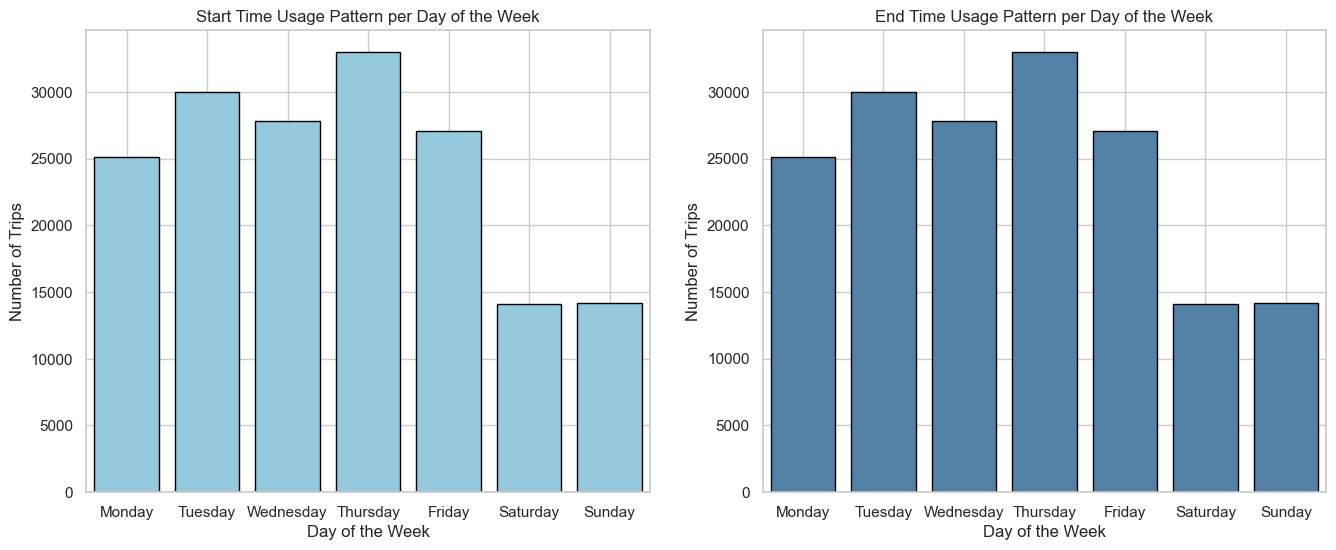

In [91]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the usage pattern per day of the week for start times
sns.barplot(ax=axes[0], x='Day of the Week', y='Start Time Trips', data=start_usage_per_day, color='skyblue', linewidth=1, edgecolor='black')
axes[0].set_title('Start Time Usage Pattern per Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Trips')
axes[0].grid(True)

# Plot the usage pattern per day of the week for end times
sns.barplot(ax=axes[1], x='Day of the Week', y='End Time Trips', data=end_usage_per_day, color='steelblue', linewidth=1, edgecolor='black')
axes[1].set_title('End Time Usage Pattern per Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Trips')
axes[1].grid(True)

plt.show()

As seen from our plot, Number of trips during the week are higher than number of trips made during the weekend. This may be as result of higher number of heading to work during the week and resting on the weekend.

### Question 2: What hour of the day is the most popular for travel?

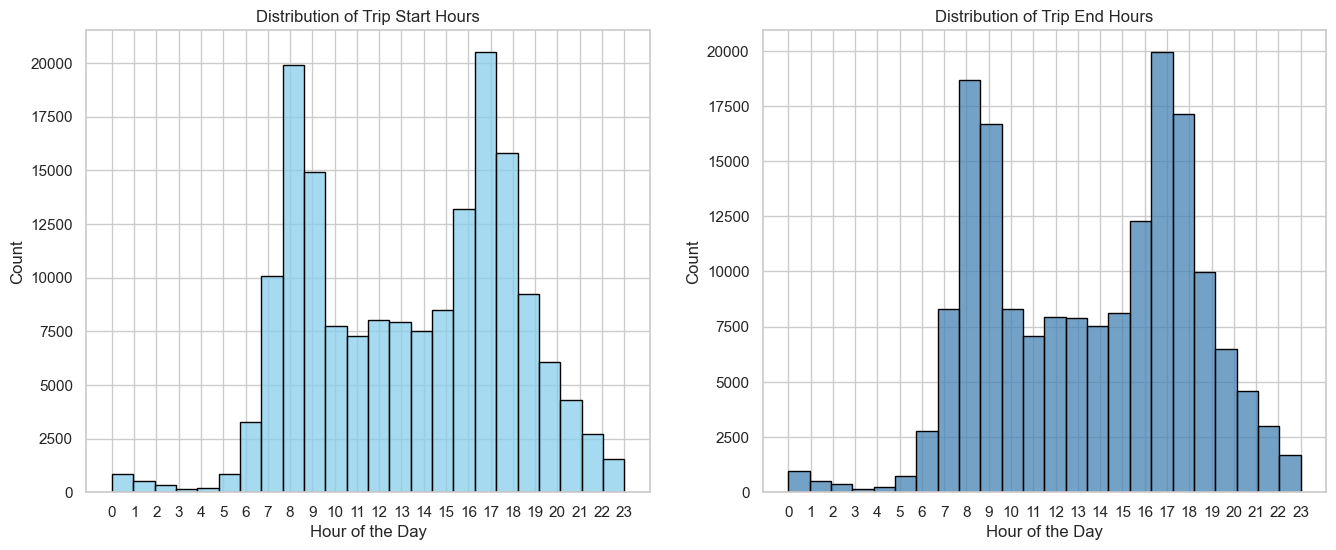

In [87]:
# Create subplots for trip start and end hours
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot histogram for trip start hours
sns.histplot(data=df, x=df['start_hr'], bins=24, color='skyblue', ax=axes[0], linewidth=1, edgecolor='black')
axes[0].set_title('Distribution of Trip Start Hours')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Count')
axes[0].grid(True)
axes[0].set_xticks(range(24))  # Set x-ticks for all hours

# Plot histogram for trip end hours
sns.histplot(data=df, x=df['end_hr'], bins=24, color='steelblue', ax=axes[1], linewidth=1, edgecolor='black')
axes[1].set_title('Distribution of Trip End Hours')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Count')
axes[1].grid(True)
axes[1].set_xticks(range(24))  # Set x-ticks for all hours

plt.show()

Additonally, as seen from our histogram, the most common time that trips were made at 5pm. 
We also see that the 8th, 9th, 17th and 18th hours have the highest travel count. This may symbolize the high trip cound made due to rush hour.

### Exploring our dataset for User type, Gender and member age distribution  

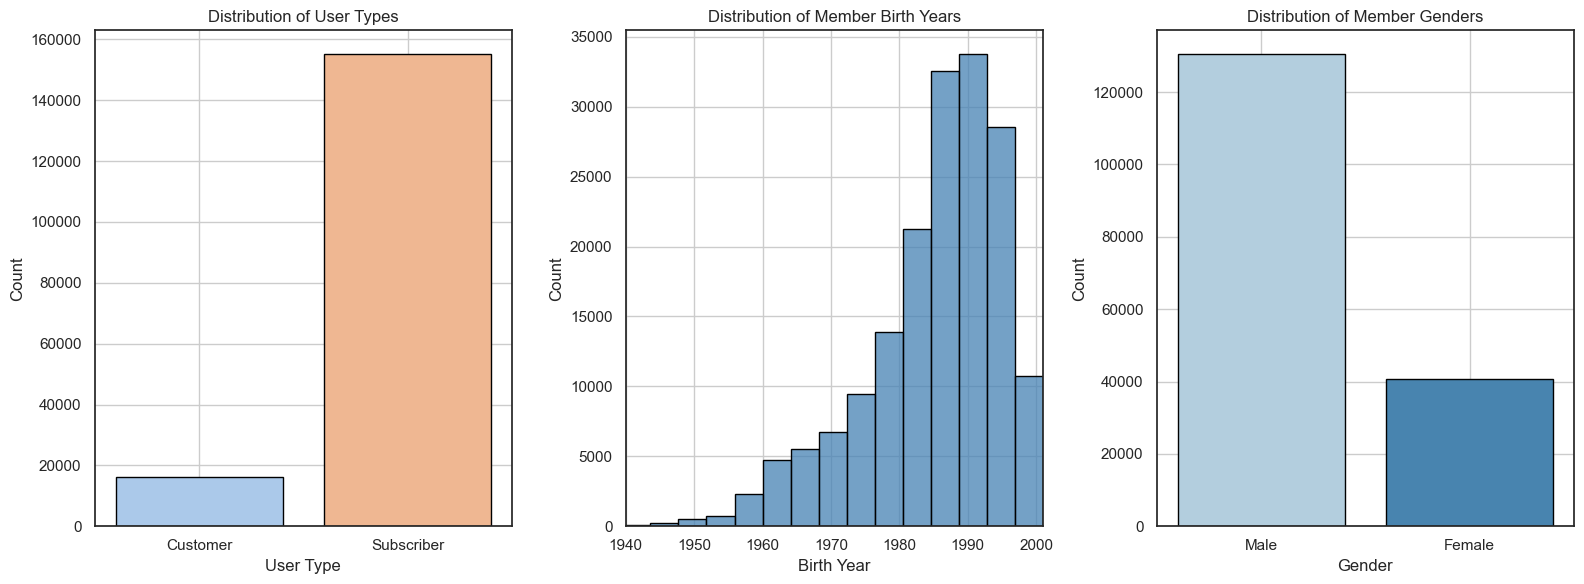

In [109]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Univariate Exploration of user_type
sns.countplot(data=df, x='user_type', ax=axes[0], palette='pastel', linewidth=1, edgecolor='black')
axes[0].set_title('Distribution of User Types')
axes[0].set_xlabel('User Type')
axes[0].set_ylabel('Count')
axes[0].grid(True)

# Univariate Exploration of member_birth_year
sns.histplot(data=df, x='member_birth_year', bins=30, kde=False, ax=axes[1], color='steelblue', linewidth=1, edgecolor='black')
axes[1].set_title('Distribution of Member Birth Years')
axes[1].set_xlabel('Birth Year')
axes[1].set_ylabel('Count')
axes[1].set_xlim(1940, df['member_birth_year'].max())
axes[1].grid(True)

# Univariate Exploration of member_gender
sns.countplot(data=df, x='member_gender', ax=axes[2], palette = 'Blues', linewidth=1, edgecolor='black')
axes[2].set_title('Distribution of Member Genders')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Count')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Additonally, it is observed that the majority of the pwople using the bike program are subscribers.
More males tend to use this program and the customers that use this are born between the years 1940 and 2000, with the most frequent age group being born between 1985 and 1995.

## Bivariate Exploration

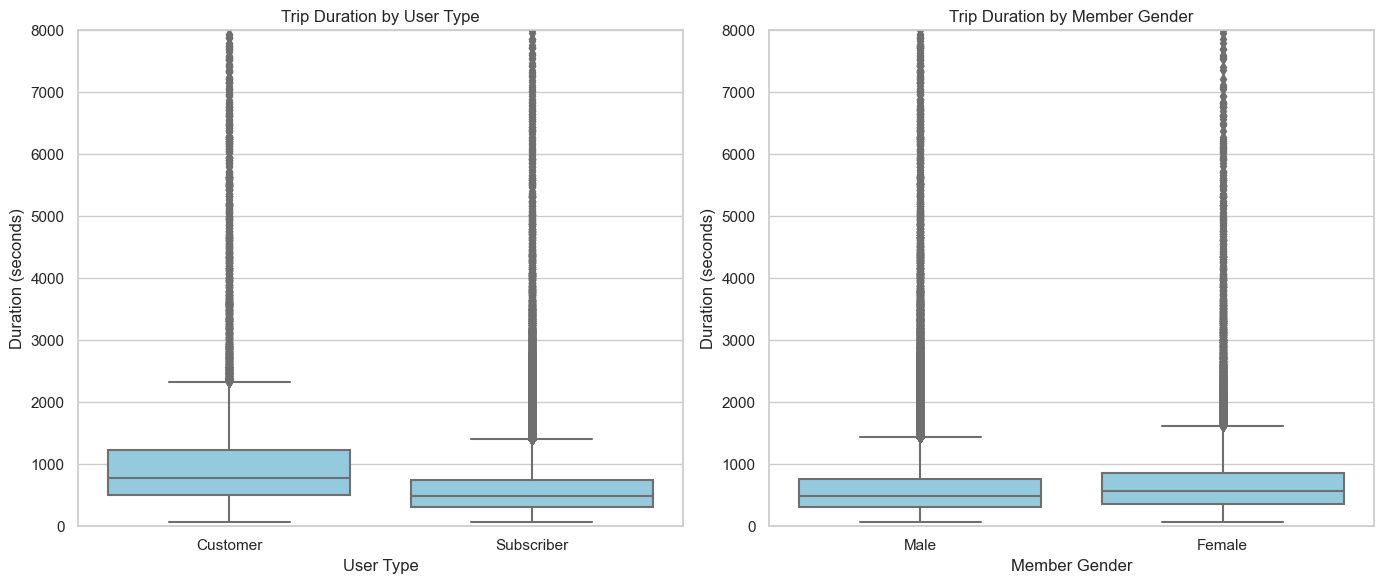

In [42]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bivariate Exploration of user_type and trip duration
sns.boxplot(data=df, x='user_type', y='duration_sec', color='steelblue', ax=axes[0])
axes[0].set_title('Trip Duration by User Type')
axes[0].set_xlabel('User Type')
axes[0].set_ylabel('Duration (seconds)')
axes[0].set_ylim(0, 8000)  # Limit y-axis to 8000

# Bivariate Exploration of member_gender and trip duration
sns.boxplot(data=df, x='member_gender', y='duration_sec', color='steelblue', ax=axes[1])
axes[1].set_title('Trip Duration by Member Gender')
axes[1].set_xlabel('Member Gender')
axes[1].set_ylabel('Duration (seconds)')
axes[1].set_ylim(0, 8000)  # Limit y-axis to 8000

plt.tight_layout()
plt.show()

It appears that customers spend more time on average compare to subscribers while the female gender spend higher time on average than male.

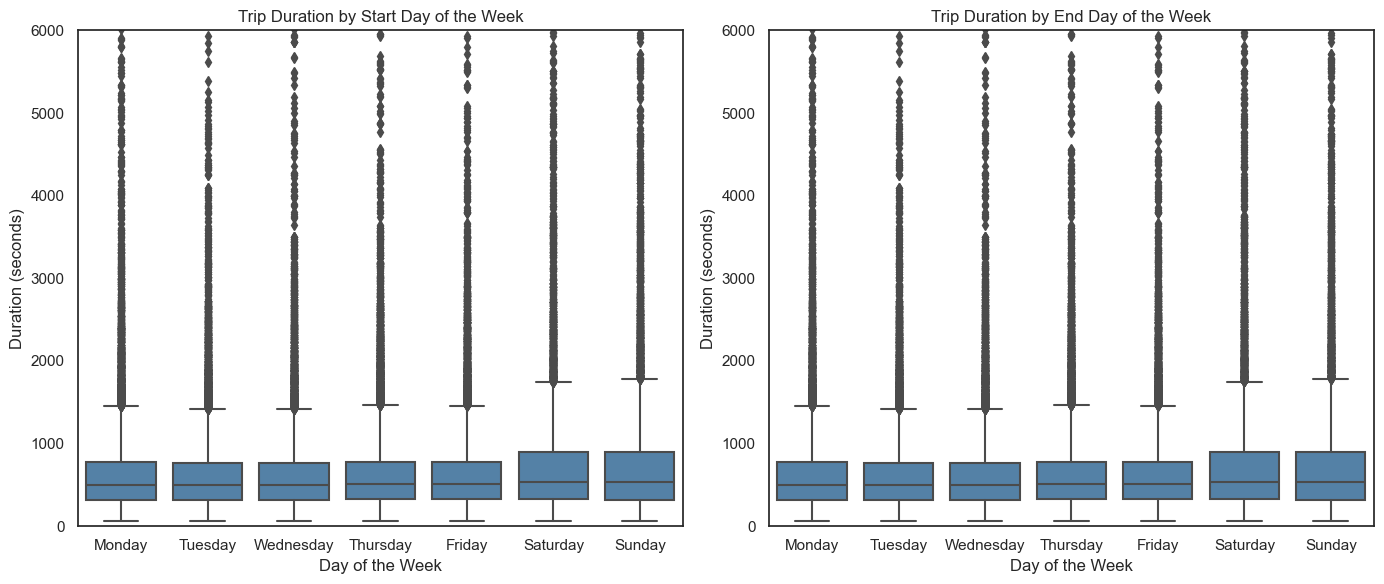

In [110]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for start_day_of_week vs trip duration
sns.boxplot(data=df, x='start_day', y='duration_sec', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                    'Friday', 'Saturday', 'Sunday'], color='steelblue', ax=axes[0])
axes[0].set_title('Trip Duration by Start Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Duration (seconds)')
axes[0].set_ylim(0, 6000)  # Limit y-axis to 8000

# Box plot for end_day_of_week vs trip duration
sns.boxplot(data=df, x='end_day', y='duration_sec', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                    'Friday', 'Saturday', 'Sunday'], color='steelblue', ax=axes[1])
axes[1].set_title('Trip Duration by End Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Duration (seconds)')
axes[1].set_ylim(0, 6000)  # Limit y-axis to 8000

plt.tight_layout()  # Adjust subplot layout
plt.show()

trip durations are higher during the weekend.

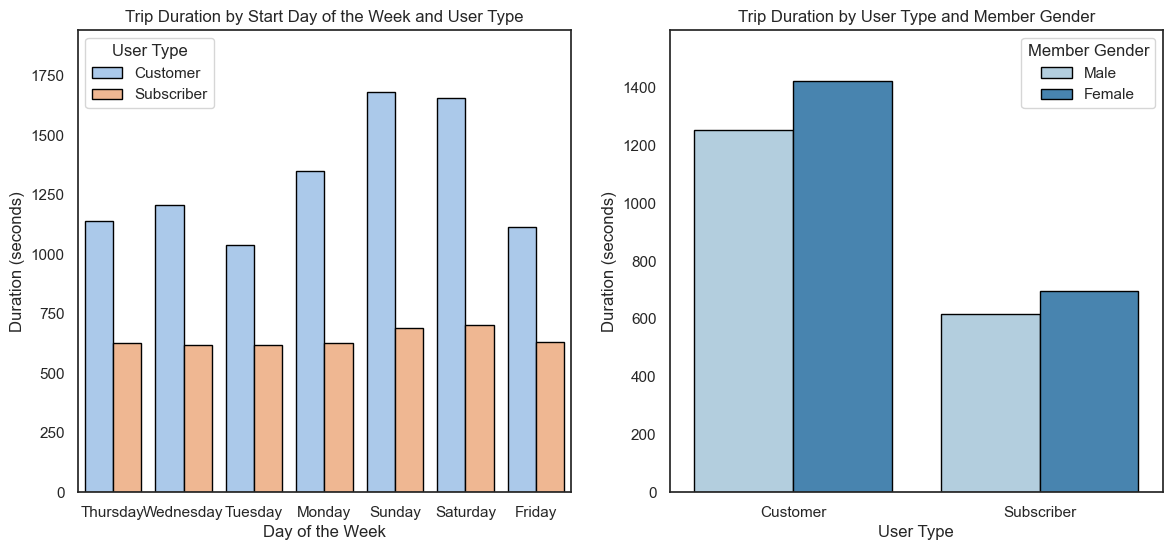

In [108]:
# Set the style of seaborn plots to white
sns.set(style="white")

# Create subplots with adjusted size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: start_day and user_type vs. duration_sec
sns.barplot(data=df, x='start_day', y='duration_sec', hue='user_type', ax=axes[0], palette = 'pastel',
            errwidth=0, linewidth=1, edgecolor='black')
axes[0].set_title('Trip Duration by Start Day of the Week and User Type')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Duration (seconds)')
axes[0].legend(title='User Type')

# Subplot 2: user_type and member_gender vs. duration_sec
sns.barplot(data=df, x='user_type', y='duration_sec', hue='member_gender', palette = 'Blues', ax=axes[1], 
            errwidth=0, linewidth=1, edgecolor='black')
axes[1].set_title('Trip Duration by User Type and Member Gender')
axes[1].set_xlabel('User Type')
axes[1].set_ylabel('Duration (seconds)')
axes[1].legend(title='Member Gender')

plt.show()

as seen from our bar plot, more customers tend to use the bike-share program than subscribers. And compared to subscribers, most of our users are male.

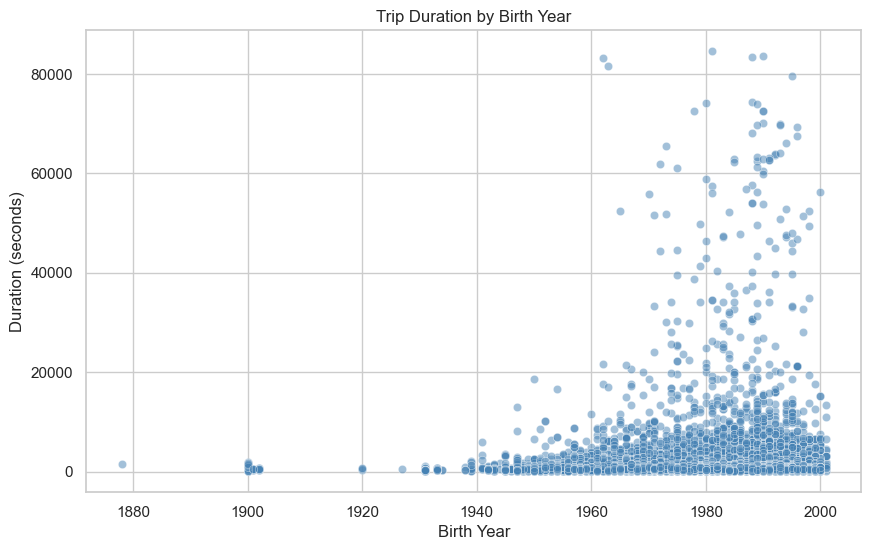

In [89]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Bivariate Exploration of birth year and trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='member_birth_year', y='duration_sec', alpha=0.5, color='steelblue')
plt.title('Trip Duration by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Duration (seconds)')
plt.show()

 As seen from the scatterplot, most of our customers are born between the years 1980 and 2000. People in these age bracket tend to have the the highest ride duration.

## Multivariate Exploration

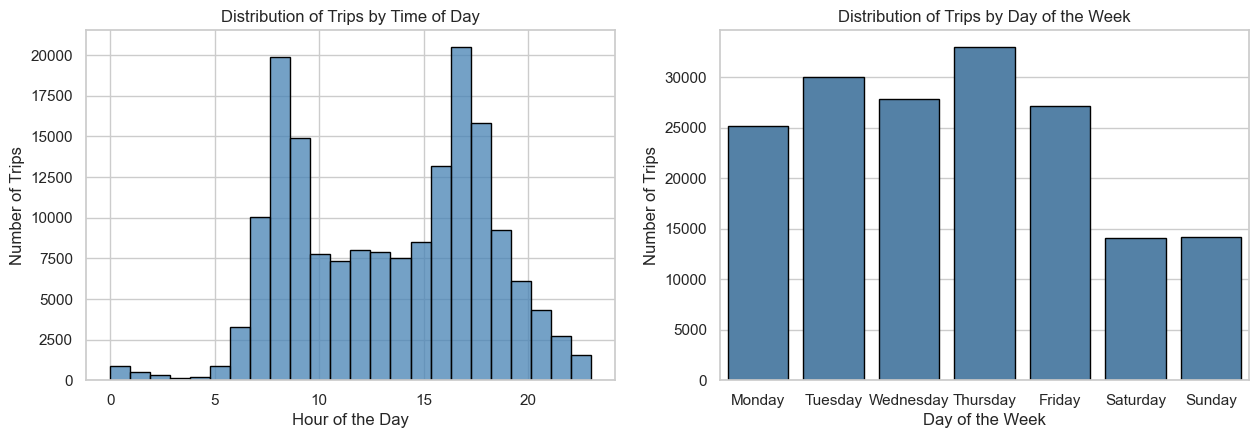

In [111]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Create facet plot for time of day, day of the week, and month of the year
plt.figure(figsize=(15, 10))

# Facet plot for time of day
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='start_hr', bins=24, kde=False, color='steelblue', linewidth=1, edgecolor='black')
plt.title('Distribution of Trips by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')

# Facet plot for day of the week
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='start_day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
              color='steelblue', linewidth=1, edgecolor='black')
plt.title('Distribution of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')

plt.show()

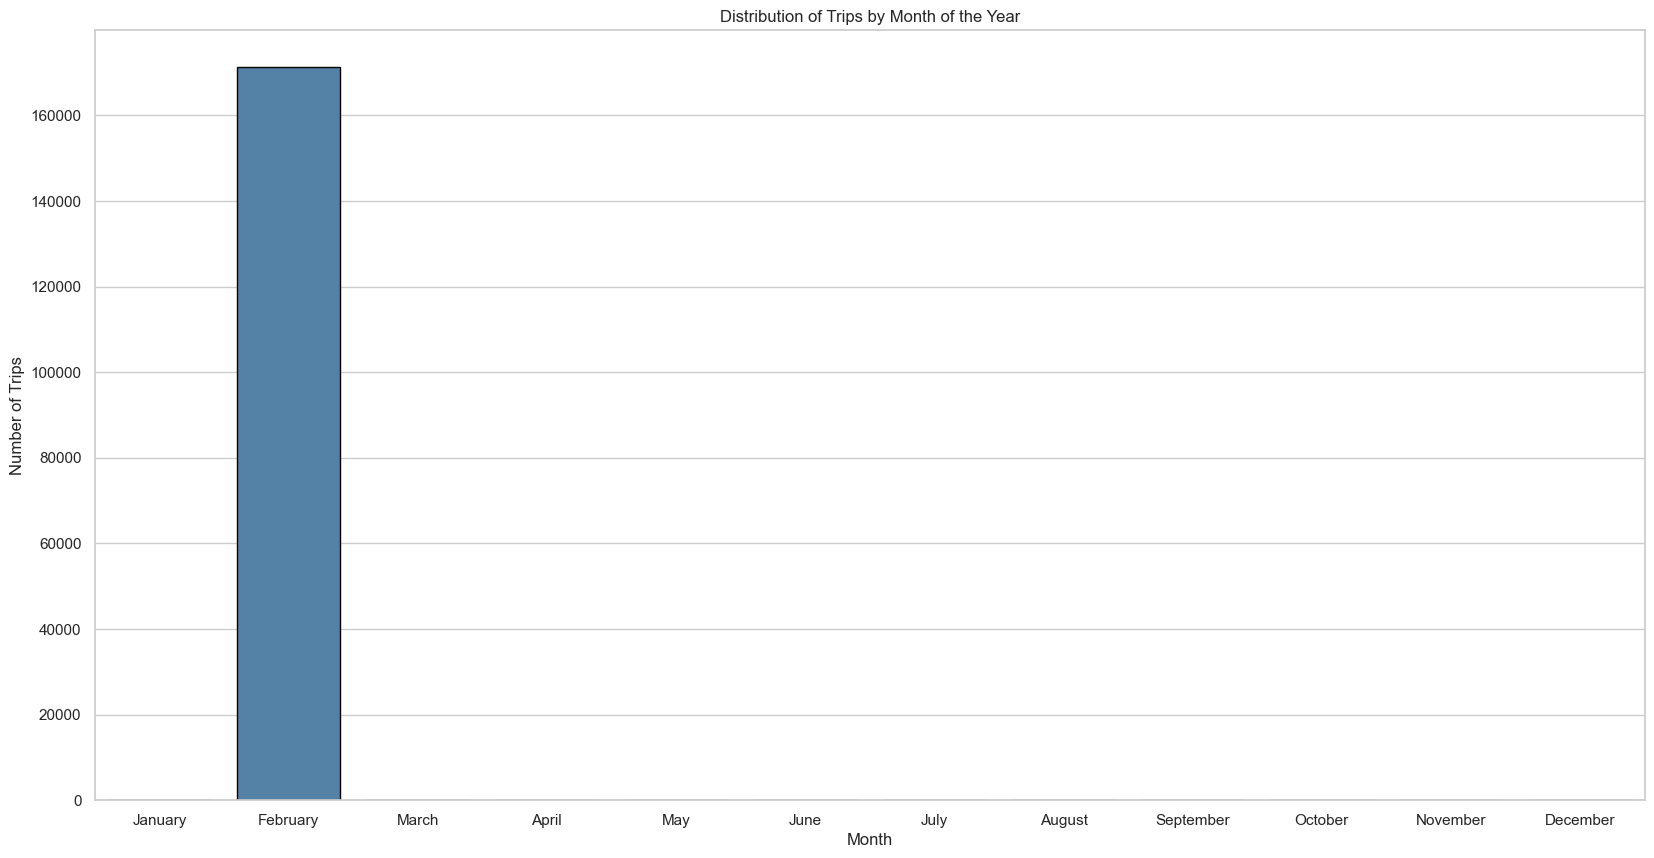

In [112]:
# Facet plot for month of the year
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='start_month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
    'August', 'September', 'October', 'November', 'December'],color='steelblue', linewidth=1, edgecolor='black')
plt.title('Distribution of Trips by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

plt.show()

It is observed that most of the users of our bike-share program take trips in February.

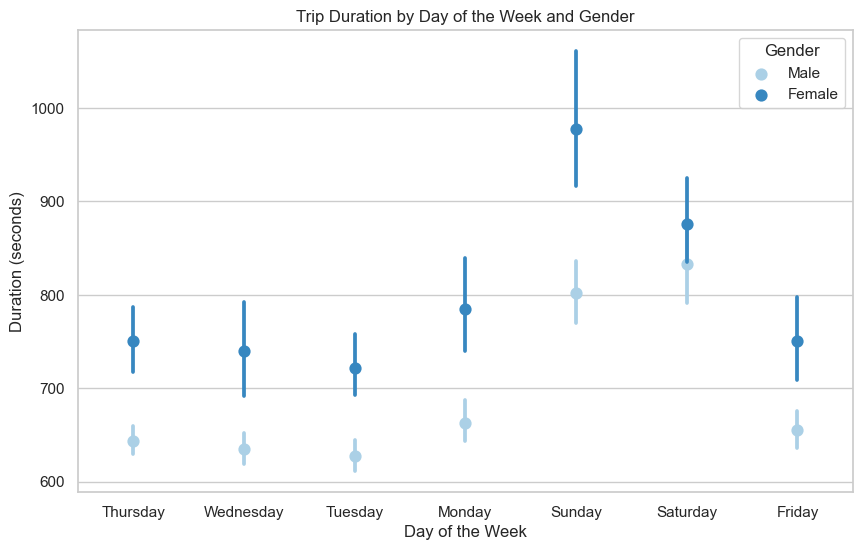

In [94]:
# Create a point plot for day of the week, gender, and trip duration
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='start_day', y='duration_sec', hue='member_gender',
              palette = 'Blues', linestyles = '')
plt.title('Trip Duration by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Duration (seconds)')
plt.legend(title='Gender')
plt.show()

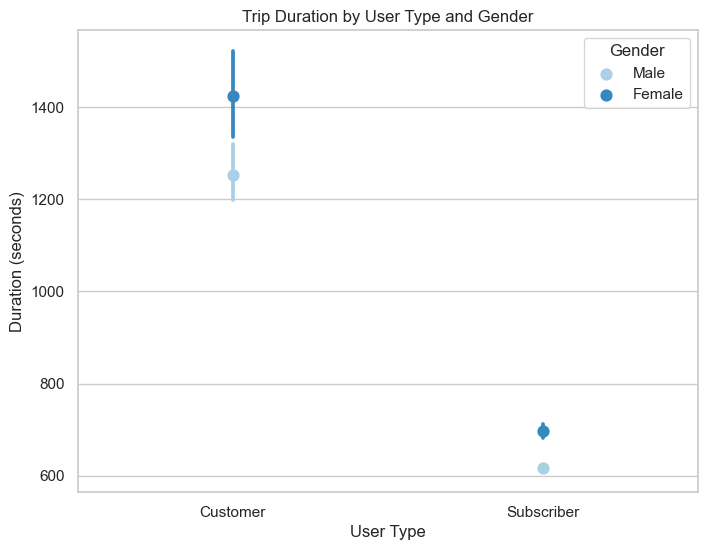

In [93]:
# Create a point plot for gender, user type, and trip duration
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='user_type', y='duration_sec', hue='member_gender',
              palette = 'Blues', linestyles = '')
plt.title('Trip Duration by User Type and Gender')
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')
plt.legend(title='Gender')
plt.show()


females spend more time using the program than males and majority of our users are females

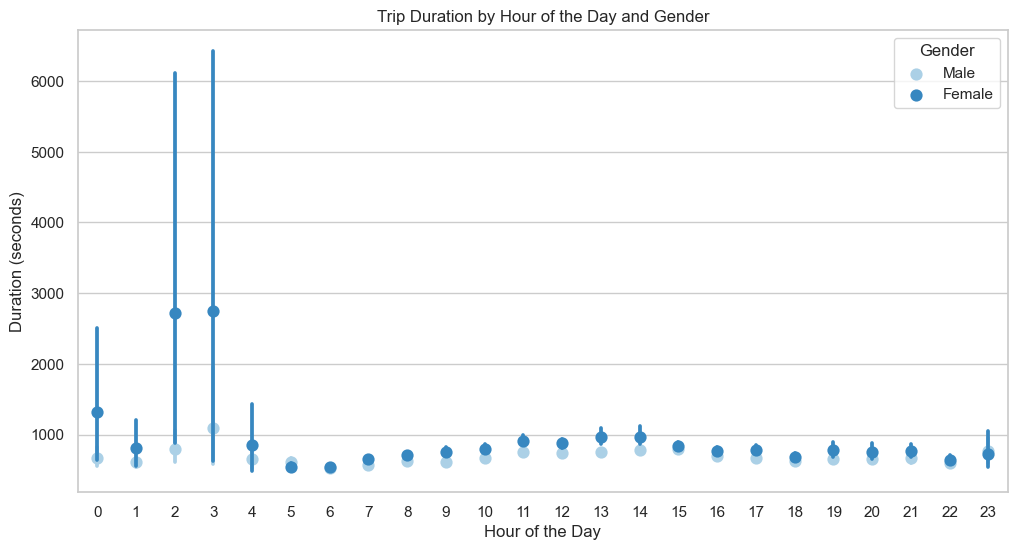

In [95]:
# Create a point plot for hour of the day, gender, and trip duration
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='start_hr', y='duration_sec', hue='member_gender',
              palette = 'Blues', linestyles = '')
plt.title('Trip Duration by Hour of the Day and Gender')
plt.xlabel('Hour of the Day')
plt.ylabel('Duration (seconds)')
plt.legend(title='Gender')
plt.show()

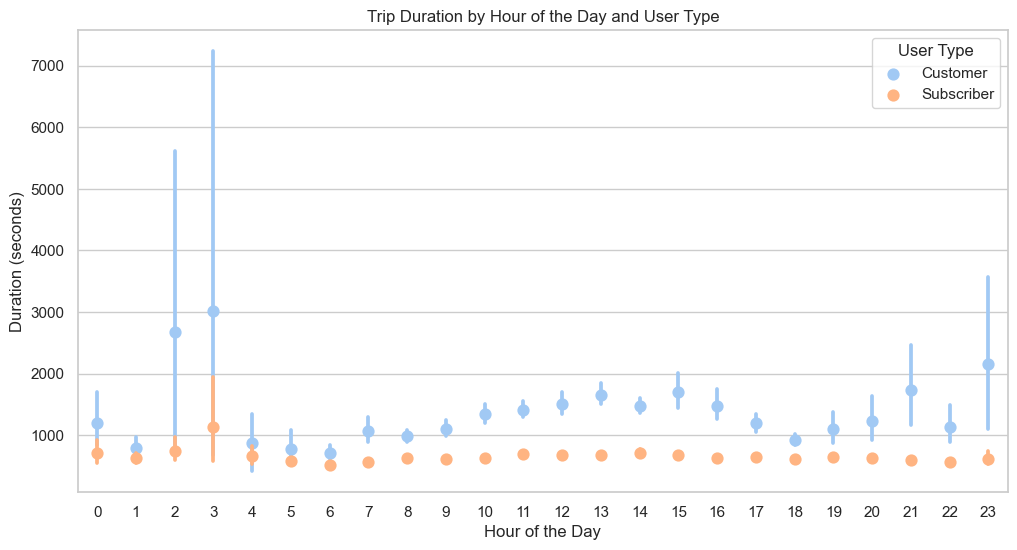

In [103]:
# Create a point plot for hour of the day, user type, and trip duration
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='start_hr', y='duration_sec', hue='user_type',
              palette = 'pastel', linestyles = '')
plt.title('Trip Duration by Hour of the Day and User Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Duration (seconds)')
plt.legend(title='User Type')
plt.show()

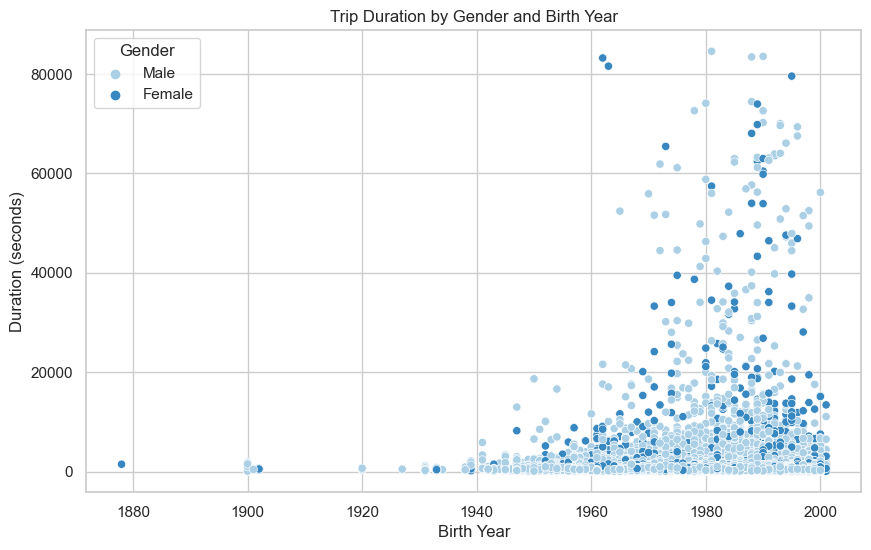

In [65]:
#  Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with gender and birth year vs trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='member_birth_year', y='duration_sec', hue='member_gender',palette = 'Blues')
plt.title('Trip Duration by Gender and Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Duration (seconds)')
plt.legend(title='Gender')
plt.show()

As seen in the scatter plot, a higher population of the men use our bike-share program but both men and women spend a lot of time using the bike share program.

In [57]:
# 1. Average Trip Time
average_trip_time = df['duration_sec'].mean()
print("Average Trip Time:", average_trip_time)

# 2. Most Common Time of Day
most_common_time_of_day = df['start_hr'].mode()[0]
print("Most Common Time of Day:", most_common_time_of_day)

# 3. Most Common Day of Week
most_common_day_of_week = df['start_day'].mode()[0]
print("Most Common Day of Week:", most_common_day_of_week)

# 4. Most common month 
most_common_month = df['start_month'].mode()[0]
print("Most Common Month:", most_common_month)

# 5. Common Route
common_route = df.groupby(['start_station_name','end_station_name']).size().idxmax()
print("Common Route:", common_route)

Average Trip Time: 697.7579813782435
Most Common Time of Day: 17
Most Common Day of Week: Thursday
Most Common Month: February
Common Route: ('Berry St at 4th St', 'San Francisco Ferry Building (Harry Bridges Plaza)')


## Conclusions

On average, trips lasted around 678 seconds. The busiest times were during typical commuting hours in the morning (8 and 9 AM) and evening (5 and 6 PM).

Weekends exhibited the lowest trip volumes, while Thursdays and Tuesdays saw the highest number of trips.

The majority of trips were made by subscribers, with males accounting for over 70% of the total users.

Customers generally had longer trip durations compared to subscribers. Additionally, females tended to have longer trips than males. Trip durations were typically longer on weekends compared to weekdays.

Interestingly, the customer type did not significantly influence the number of trips per weekday.

Overall, customers traveled for extended periods, irrespective of the day, compared to subscribers.